In [122]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
#setting up the parameters
N = 10000 #total number of rounds in which customers connect to the online website
d = 9 # number of strategies (explore the number of strategies in the future)
conversion_rate=[0.05,0.13,0.09,0.16,0.11,0.04,0.2,0.08,0.01]#placing conversion rates in a list

In [135]:
#creating simulation 
# initially array will be composed of zeros but will be updated with ones when we get a conversion
X = np.array(np.zeros([N,d])) #generating a simulation over 10K rounds. #Using a Bernouli distribution. N is 10K rows, d is 9 columns
# make a for loop to loop over rows, then loop again over the columns. This will populate our array with one values.
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rate[j]: #if random number taken between 0 and 1 is lower than conversion rate of strategy number j
            X[i,j] = 1 #update cell to one if the above condition is met

In [126]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# Implementing a Random Strategy and Thompson Sampling

In [152]:
# Implementing a Random Strategy and Thompson Sampling
strategies_selected_rs = [] #list of strategies selected over a round randomly. Need for our strategy and benchmark
strategies_selected_ts = [] #thompson sampling strategy
total_reward_rs = 0  #accumulated sum of rewards over round 
total_reward_ts = 0
numbers_of_rewards_1 = [0] *d #the number of times strategy has recieved a one award up until round n. 
numbers_of_rewards_0 = [0] *d #the number of times a strategy has received a zero award up until round n
# Big for loop!
for n in range(0,N):
    strategy_rs=random.randrange(d) # Random Strategy from our random module
    strategies_selected_rs.append(strategy_rs) #appends our first strategy randomly selected from strategies
    reward_rs = X[n, strategy_rs] # reward received by the random strategy
    total_reward_rs = total_reward_rs + reward_rs #total_reward_rs += reward_rs #updated by the reward we just obtained
    strategy_ts = 0 #Thompson Sampling
    max_random = 0 #corresponds to a maximum we are trying to get
    for i in range (0, d):#step 1 will loop over all nine strategies
        random_beta = random.betavariate(numbers_of_rewards_1[i] +1,numbers_of_rewards_0[i] +1) #Gives us the random draw from distributions for each of our 9 strategies
        if random_beta >max_random: #if new random beta is larger than the old random beta, update max random to new one
            max_random = random_beta #a more practical way to get max random than making list, getting random betas, using argmax to get maximum
            strategy_ts = i #step 2 get the strategy that has the maximum of random draws
# Step 3 of algorithm 
#get out of the previous for loop, update the number of times strategies have received reward one, reward zero up to round n
#check reward for the strategy selected in step 2, update number for specific strategy selected in step 2, do the same for zero reward
        reward_ts =X[n,strategy_ts] #get this from matrix of rewards created in simulation
#implement 2 conditions to get a number
        if reward_ts == 1:
            numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1 # or numbers_of_rewards_1[strategy_ts] +=1
        else:
            numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1 # numbers_of_rewards_0[strategy_ts] +=1  #only element of list corresponding to strategy selected
        strategies_selected_ts.append(strategy_ts)
        total_reward_ts = total_reward_ts + reward_ts # accumulated reward. Needed for comparison to  benchmark later in code
    

# Comparison of our Thompson Sampling vs Benchmark (random sampling)

In [167]:
#Computing the Absolute and Relative Return(RR)
#RR is the return an asset (i.e Thompson sampling) achieves over a period of time compared to a benchmark(i.e random strategy)
#By what percentage more does it achieve this?
absolute_return = (total_reward_ts - total_reward_rs) * 100
relative_return = ((total_reward_ts - total_reward_rs) / total_reward_rs) * 100
print("The Absolute Return: {:.0f} $".format(absolute_return))
print("\n")
print("The Relative Return: {:.0f} %".format(relative_return))

The Absolute Return: 97200 $


The Relative Return: 101 %


In [168]:
total_reward_rs

963.0

In [169]:
total_reward_ts

1935.0

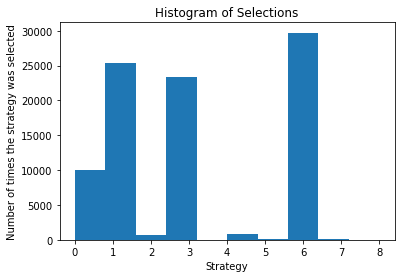

In [155]:
plt.hist(strategies_selected_ts)
plt.title('Histogram of Selections')
plt.xlabel('Strategy')
plt.ylabel('Number of times the strategy was selected')
plt.show() #note strategy 6 is actually strategy number 7

# Conclusion: Thompson Sampling finds the best advertising strategies over Random Sampling even if the total number of rounds in which customers connect to the online website are reduced to 1000 rounds.

# Regret Curve of a model

In [158]:
#The regret curve of a model (Random Strategy or Thompson Sampling) is the plot of the difference between the best strategy and the deployed model, with respect to the rounds.
#best strategy is computed by simply getting, at each round, the maximum of the accumulated rewards over all the different strategies.
rewards_strategies = [0] * d
for n in range (0, N):
    for i in range(0,d):
        rewards_strategies[i] = rewards_strategies[i] + X[n, i]
    total_reward_bs=max(rewards_strategies)

In [163]:
#regret_TS = total_rewards_bs - total_reward_ts
#1st find the regret of the Thompson Sampling
# Regret of Thompson Sampling
strategies_selected_ts = []
total_reward_ts = 0
total_reward_bs = 0
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
rewards_strategies = [0] * d
regret_TS = []
for n in range(0, N):
    # Thompson Sampling
    strategy_ts = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1,
                                             numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            strategy_ts = i
    reward_ts = X[n, strategy_ts]
    if reward_ts == 1:
        numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1
    else:
        numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1
    strategies_selected_ts.append(strategy_ts)
    total_reward_ts = total_reward_ts + reward_ts
    # Best Strategy
    for i in range(0, d):
        rewards_strategies[i] = rewards_strategies[i] + X[n, i]
    total_reward_bs = max(rewards_strategies)
    # Regret
    regret_TS.append(total_reward_bs - total_reward_ts)

In [161]:
#repeat the above process for finding the regret of the Random Strategy
# Regret of the Random Strategy
strategies_selected_rs = []
total_reward_rs = 0
total_reward_bs = 0
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
rewards_strategies = [0] * d
regret = []
for n in range(0, N):
    # Random Strategy
    strategy_rs = random.randrange(d)
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs]
    total_reward_rs = total_reward_rs + reward_rs
    # Best Strategy
    for i in range(0, d):
        rewards_strategies[i] = rewards_strategies[i] + X[n, i]
    total_reward_bs = max(rewards_strategies)
    # Regret
    regret.append(total_reward_bs - total_reward_rs)

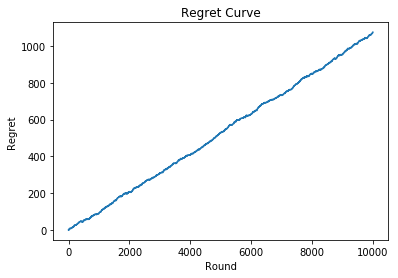

In [162]:
# Plotting the Regret Curve. X-coordinates represent the rounds which are indexes from 0 to N
plt.plot(regret)
plt.title('Regret Curve')
plt.xlabel('Round')
plt.ylabel('Regret')
plt.show()

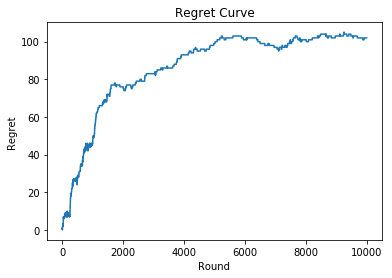

In [164]:
plt.plot(regret_TS)
plt.title('Regret Curve')
plt.xlabel('Round')
plt.ylabel('Regret')
plt.show()

# Conclusion:

We observe absolutely no convergence of the Random Strategy towards the Best Strategy.

Thompson Sampling is converging very well towards the best strategy.

In [ ]:
# BTW Thompson sampling outperforms UCB algorithm as well

# Addendum

In [ ]:
conversion_rate=[0.05,0.13,0.09,0.16,0.11,0.04,0.2,0.08,0.01] # use this to demonstrate that the model works going from left to right